## Zadanie domowe: morfologiczna gra w życie – John Conway

### Wykorzystanie operacji LUT w przekształceniu trafi, nie trafi
  - Szybszą metodą wykonania transformacji trafi, nie trafi może być operacja LUT.
  - Technika polega na zakodowaniu wyników wszystkich interesujących  konfiguracji, a następnie podczas przetwarzania wykorzystania operacji LUT.
  - Dla otoczenia 3x3 możliwe jest 512 różnych konfiguracji.
  - Aby praktycznie zrealizować operacje, każdej konfiguracji należy nadać unikalny indeks. Jedną z możliwości jest pomnożenie elementu strukturalnego przez macierz (mnożenie odpowiednich elementów):
  ```
  [[1, 8,  64],
   [ 2, 16, 128],
   [ 4, 32, 256]]
  ```
  Przykładowo elementowi:
  ```
  [[1, 1, 0],
   [ 1, 0, 1],
   [ 1, 0, 1]]
  ```
  odpowiada liczba: 1(1) + 2(1) + 4(1) + 8(1) + 128(1) + 256(1) = 399.
  
### Przykład działania metody – detekcja punktów końcowych na obrazie.
  - założenie: punkt końcowy to punkt, który ma dokładnie jednego sąsiada,
  - zdefiniuj funkcję, która jako argument pobiera otoczenie, a zwraca 0 lub 1 w zależności od tego, czy rozpatrywany punkt jest końcowy np. dla sąsiedztwa 3×3 punkt będzie końcowy, jeżeli jest zapalony i ma tylko jednego sąsiada (czyli suma pikseli jest równa 2).
  - wygeneruj przekodowanie LUT.
  - wczytaj obraz szkielet.bmp (należy go przekształcić, aby uzyskać dwuwymiarową tablicę o wartościach 0-1). Wykorzystując wygenerowane przekodowanie LUT wykonaj detekcję zakończeń. Wyświetl obraz oryginalny i po przekodowaniu LUT.

### Gra w życie

Reguły gry w życie:
  - każdy piksel biały, który ma dwóch lub trzech sąsiadów (białych) przeżywa,
  - każdy piksel biały, który ma 0,1 lub więcej niż trzech sąsiadów (białych) nie przeżywa (głód lub przeludnienie),
  - jeżeli jakieś pole (czarne) sąsiaduje dokładnie z trzema pikselami białymi, to na tym polu ,,rodzi'' się nowy piksel biały.

Zadanie:
  - za pomocą mechanizmu LUT (opisanego wcześniej) należy zaimplementować morfologiczną gre w życie,
  - najważniejszym elementem jest funkcja opisująca reguły gry,
  - symulacje należny przeprowadzić dla plansz dostarczonych w pliku gra.py,
  - dobrze jest wykonać kilka iteracji – zobaczyć jak zmienia się kształt,
  - inne ciekawe kształty do znalezienia w internecie.


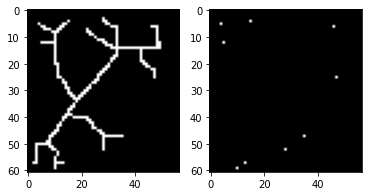

In [12]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

if not os.path.exists("gra.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morfologia/gra.py --no-check-certificate

def funLUT(kernel):
    return kernel[1,1] == 1 and np.sum(kernel) == 2
        
def lut(img):
    res = np.zeros(img.shape)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            window = img[i-1:i+2,j-1:j+2]
            res[i,j] = funLUT(window)
    return res


szkielet = cv2.imread("szkielet.bmp",cv2.IMREAD_GRAYSCALE)
# plt.imshow(szkielet,'gray')

szkielet = szkielet > 1
szkielet = szkielet.astype(np.int)

f,a = plt.subplots(1,2)
a[0].imshow(szkielet,'gray')
a[1].imshow(lut(szkielet),'gray')

In [13]:
def liveOrDie(window):
    if window[1,1]:
        if np.sum(window)-1 == 2 or np.sum(window)-1 == 3:
            return 1
        else:
            return 0
    else:
        if np.sum(window) == 3:
            return 1
        else:
            return 0
        

def gameOfLife(plansza):
    res = np.zeros(plansza.shape)
    for i in range(1,plansza.shape[0]-1):
        for j in range(1,plansza.shape[1]-1):
            window = plansza[i-1:i+2,j-1:j+2]
            res[i,j] = liveOrDie(window)
    return res

In [14]:
import numpy as np

plansza1 = np.array([
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	1,	0,	0,	1,	0,	0,	0],
    [0,	0,	0,	1,	1,	1,	1,	0,	0,	0],
    [0,	0,	1,	0,	0,	0,	0,	1,	0,	0],
    [0,	0,	1,	0,	1,	1,	0,	1,	0,	0],
    [0,	0,	1,	0,	0,	0,	0,	1,	0,	0],
    [0,	0,	0,	1,	1,	1,	1,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0]], np.uint8)

plansza2 = np.array([
    [0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0]], np.uint8)

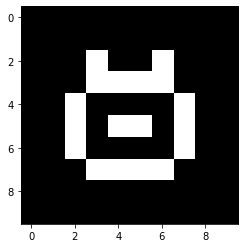

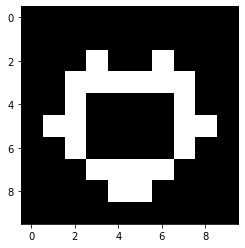

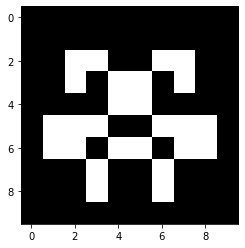

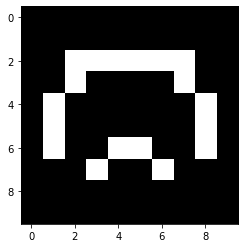

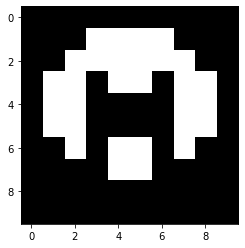

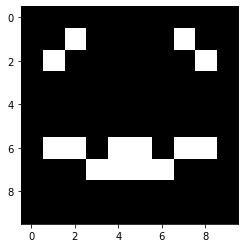

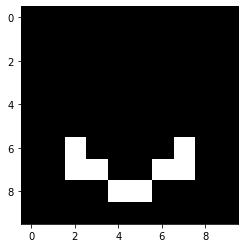

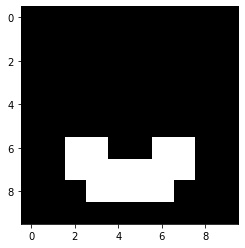

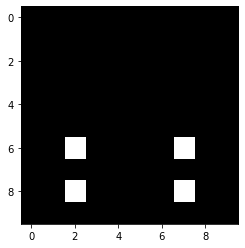

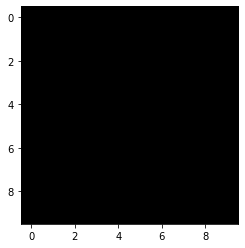

In [15]:
# f,a = plt.subplots(1,2)
# a[0].imshow(plansza1,'gray')
# a[1].imshow(gameOfLife(plansza1),'gray')
def letsPlay(plansza):
    plt.imshow(plansza,'gray')
    plt.show()
    if np.sum(plansza) <= 0: return
    letsPlay(gameOfLife(plansza))
    
        
letsPlay(plansza1)

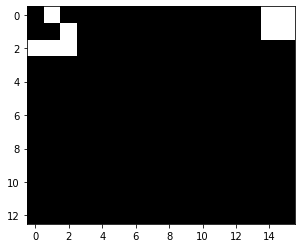

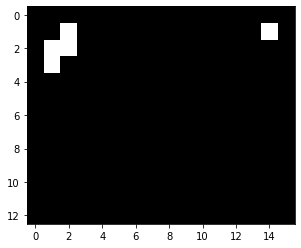

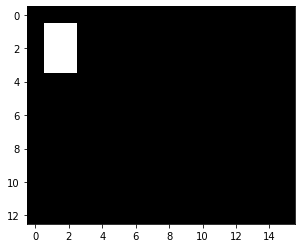

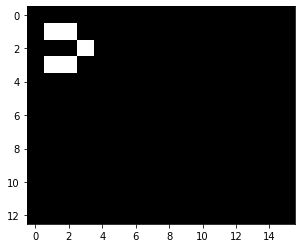

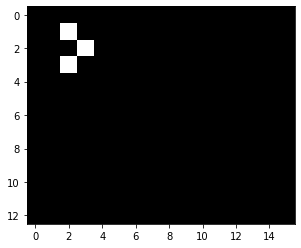

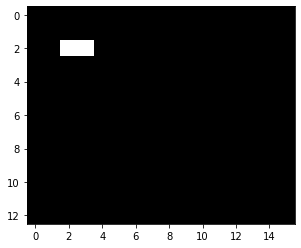

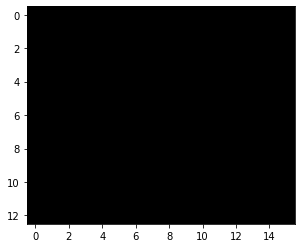

In [4]:
letsPlay(plansza2)